In [5]:
# This code illustrates the use of linear regression to fit a quadratic model to a data set.

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

speed = [x for x in range(0,17)]
StoppingData = [0, 3, 6, 11, 21, 32, 47, 65, 87, 112, 140, 171, 204, 241, 282, 325, 376]
y = StoppingData

speedsquared = [x**2 for x in speed]  # We're going to be regressing the stopping data on the squares of the speed values.

x = sm.add_constant(speedsquared)  
# This is a technical aspect of the OLS function that we're using.  
# Since we're working with a model yhat = a + bx^2, or yhat = a(1) + bx^2, the OLS function is expecting a 2D array of
# 1's and the squares of the speeds, so that each input data point looks like [1, speedvalue^2]. 

print(x) # Just to see what things look like.


results = sm.OLS(y,x).fit()

results.summary()

[[  1.   0.]
 [  1.   1.]
 [  1.   4.]
 [  1.   9.]
 [  1.  16.]
 [  1.  25.]
 [  1.  36.]
 [  1.  49.]
 [  1.  64.]
 [  1.  81.]
 [  1. 100.]
 [  1. 121.]
 [  1. 144.]
 [  1. 169.]
 [  1. 196.]
 [  1. 225.]
 [  1. 256.]]


C:\Users\mspivey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.548e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.20e-25
Time:                        13:12:06   Log-Likelihood:                -42.051
No. Observations:                  17   AIC:                             88.10
Df Residuals:                      15   BIC:                             89.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2776      1.093     -2.999      0.009      -5.607      -0.948
x1             1.4564      0.009    159.610      0.000       1.437       1.476
==============================================================================
Omnibus:                        2.773   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.132
Skew:                           0.827   Prob(JB):                        0.344
Kurtosis:                       2.478   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

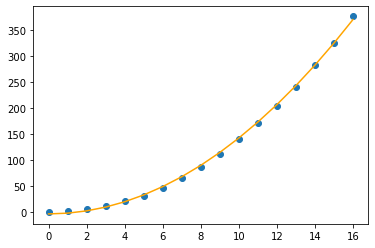

In [6]:
const = -3.278
lincoeff = 1.456
yhat = [const + lincoeff*x for x in speedsquared]
plt.scatter(speed, y)
plt.plot(speed,yhat,c='orange')

In [8]:
r = np.corrcoef(speedsquared,y)
r

array([[1.        , 0.99970573],
       [0.99970573, 1.        ]])

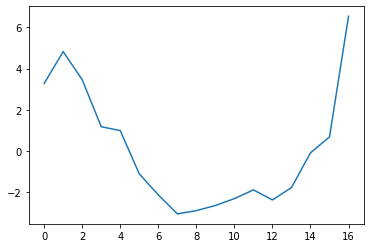

In [7]:
residual = [x - y for x,y in zip(StoppingData,yhat)]
plt.plot(residual)